In [1]:
# Import the necessary libraries
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 # *TITANIC DISASTER*

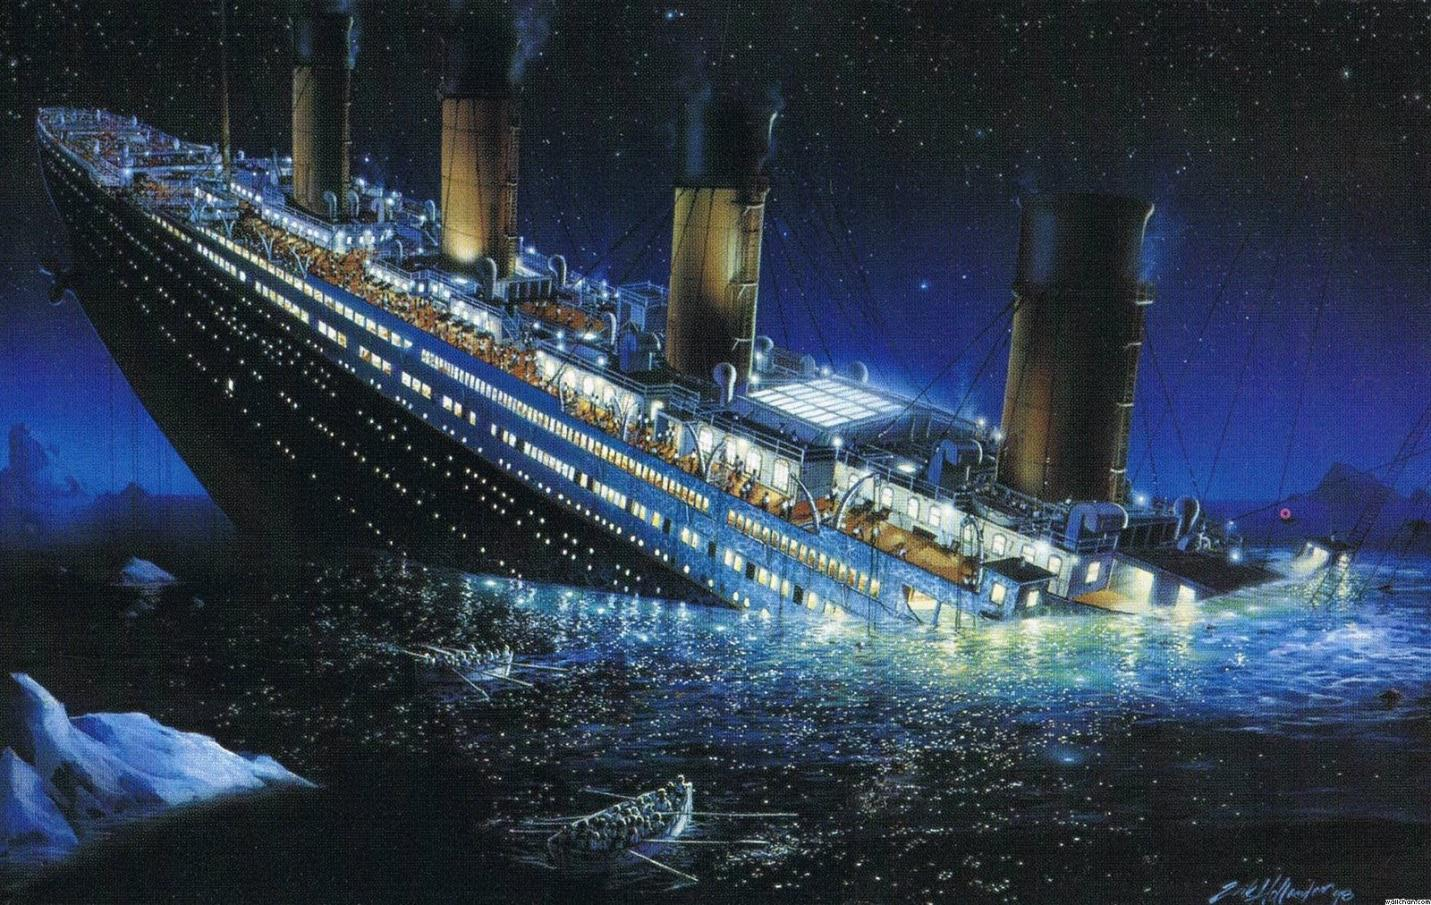

In [2]:
display(Image(filename="titanic.jpg", width = 1100)) 

In [3]:
# Read the data from a CSV file to a pd DataFrame
data = pd.read_csv("train.csv")

# CONTEXT

Based on everyday observations, relying on empirical knowledge let's put forward some hypotheses, namely:
* The upper-class passengers were most likely to survive;
* Saving the lives of women is an absolute priority in all critical situations, so women were most likely to survive (survival both of wemen and child will be considered too);
* There was a relationship between embarkment point of the passengers and survival;
* There was a relationship between age of the passengers and survival: children (<=16) were most likely to survive and their survival rate is higher than in other age groups;
* Passengers who travelled with family were most likely to survive;
* The larger the family size, the less chance a passenger has to survive.

In [4]:
# Display the data for further processing
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# DATA QUALITY ASSESSMENT 

In [5]:
# Find out the dimension of the DataFrame
dimension = data.shape
print(f'The number of rows in the DF:', dimension[0], '\n'
      f'The number of columns in the DF:', dimension[1])



The number of rows in the DF: 891 
The number of columns in the DF: 12


So, the train-data contains 891 rows and 12 columns (including the column 'Survived' with target variables).

In [6]:
# Find out the type of each column in the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Count the number of zero values in each column
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Analyze the percentage of missing values from the total amount of data
data.isnull().sum() / len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

2 of the features are float, 5 are integer and 5 are object.
Among the analyzed data there are missing (null) values here:
 * The column 'Age' contains 177 missing values that can be filled in with the mean value in the column.
 * The column 'Cabin' can be removed from the dataset, since 77% of data is missed.
 * The column 'Embarked' contains only 2 missing values that can be easily filled in with the value of the cabin in which the largest number of passengers sat.
 

In [9]:
#Take a look at the duplication in the DataFrame as a whole
data.duplicated().sum()

0

There is no duplicated data in the DF.

In [10]:
# Drop the column "Cabin" because it contains more than 70% of the missing values
data = data.drop('Cabin', axis = 1)

In [11]:
# Replace omissions with the mean value in the column "Age"
data['Age'] = data['Age'].fillna(data['Age'].mean()).astype(np.float64)

In [12]:
# Replace omissions in the column "Embarked" with the value of the cabin in which the largest number of passengers sat 
MaxEmbarked = data.groupby('Embarked').count()['PassengerId']
data.Embarked[data['Embarked'].isnull()] = MaxEmbarked[MaxEmbarked == MaxEmbarked.max()].index[0]

C:\Users\9E0A~1\AppData\Local\Temp/ipykernel_13792/2069161286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Embarked[data['Embarked'].isnull()] = MaxEmbarked[MaxEmbarked == MaxEmbarked.max()].index[0]


In [13]:
# Check the result of filling in the missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
# Look at the descriptive statistics (including categorical features)
data[['Survived', 'Pclass','Age', 'Fare']].describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,13.002015,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.910400
50%,0.000000,3.000000,29.699118,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


Consider some example of the obtained conclusions:
* Mean: If we start considering mean-value of the columns, the indicators will be as follows - Fare is 32.20 USD, Age is 29 years.
* Standard deviation of the data, specially 'Fare' shows that the numbers are spread out that can be explained by the dependence on the Pclass.
* Max: for example, the highest fare for the ticket was 512.33 USD.

# EXPLORATORY DATA ANALISES

## 1. Exploring each individual variable

* SURVIVED  

In [15]:
# Сalculate the number of survivors and the dead
data.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

Thus, among all the passengers traveling on the Titanic 549 died and 342 survived.

<AxesSubplot:title={'center':'Number of survivors and dead among all the passengers'}, xlabel='Survived', ylabel='count'>

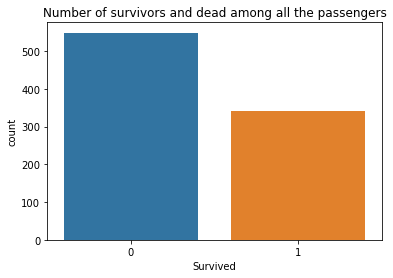

In [16]:
# Depict the number of survivors and dead
plt.title('Number of survivors and dead among all the passengers')
sns.countplot(x='Survived', data=data)

Text(0.5, 1.0, 'Percentage of survivors and dead among all the passengers')

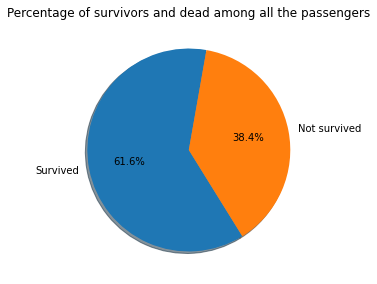

In [17]:
# Сalculate the percentage of survivors and dead, depict it on a pie chart
persantage_surv_and_dead = data['Survived'].value_counts() / len(data)
plt.figure(figsize=(10,6))
x1 = plt.subplot(121, aspect='equal')
plt.pie(persantage_surv_and_dead, labels=['Survived','Not survived'],autopct='%1.1f%%',startangle=80, shadow=True)
plt.title('Percentage of survivors and dead among all the passengers') 


From the distribution of data in the categorical column 'Survived' it can be seen that 61.6% (549 people) of the total number of passengers survived, while 38.4% (342 people) died.

* PCLASS

In [18]:
# Сalculate the number of passengers who have traveled in each class
data.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of passengers who have traveled in each class')

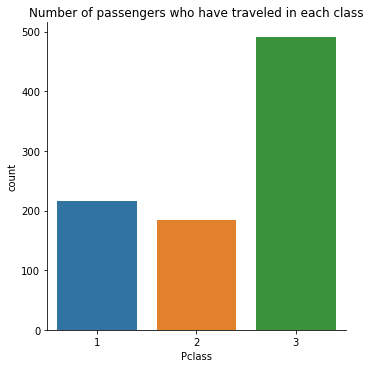

In [19]:
# Depict the number of passengers who have traveled in each class
sns.catplot('Pclass', data=data, kind='count')
plt.title('Number of passengers who have traveled in each class')

Text(0.5, 1.0, 'Percentage of the passengers who have traveled in each class')

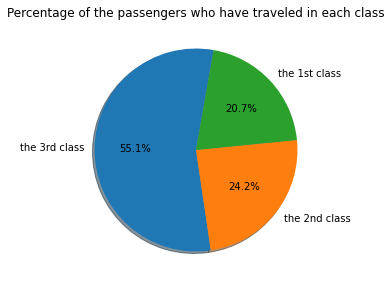

In [20]:
#Calculate the percentage of passengers who have traveled in each class, draw it on a pie chart
persantage_class = data['Pclass'].value_counts() / len(data)
plt.figure(figsize=(10,6))
x1 = plt.subplot(121, aspect='equal')
plt.pie(persantage_class, labels=['the 3rd class','the 2nd class','the 1st class' ],autopct='%1.1f%%',startangle=80, shadow=True)
plt.title('Percentage of the passengers who have traveled in each class') 

Statistics show that more than half of the passengers preferred to travel third class. This trend is most likely related to the incomes of the population.

* SEX

In [21]:
# Calculate the number of male and female among all the passengers
data.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(3.674999999999997, 0.5, 'Number')

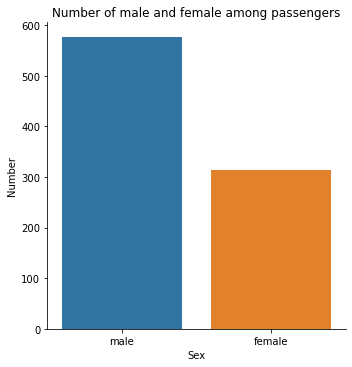

In [22]:
# Depict the number of male and female among all the passengers
sns.catplot('Sex', data=data, kind='count')
plt.title('Number of male and female among passengers') 
plt.ylabel('Number')

Text(0.5, 1.0, 'Percentage of female and male among all the passengers')

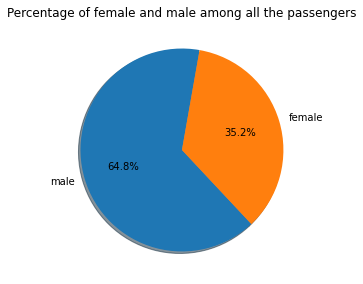

In [23]:
# Calculate the percentage of female and male among all the passengers, draw it on a pie chart
persantage_class = data['Sex'].value_counts() / len(data)
plt.figure(figsize=(10,6))
x1 = plt.subplot(121, aspect='equal')
plt.pie(persantage_class, labels=['male','female'], autopct='%1.1f%%', startangle=80, shadow=True)
plt.title('Percentage of female and male among all the passengers') 

The results allow us to draw the following conclusions, namely: there were almost half as many women on the ship.

* Embarked

In [24]:
# Calculate the number of passengers who have embarked from different ports: C = Cherbourg, Q = Queenstown, S = Southampton
data.groupby('Embarked').size()

Embarked
C    168
Q     77
S    646
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The number of passengers who have embarked from Southampton, Queenstown, Cherbourg')

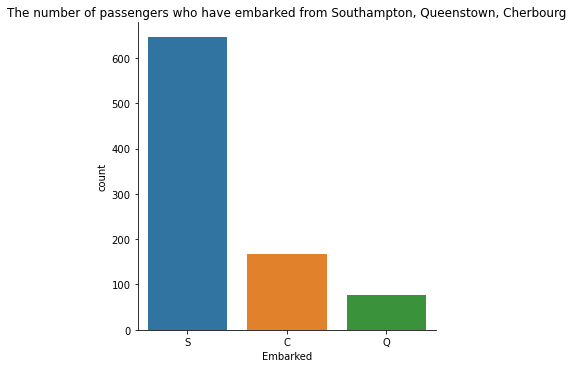

In [25]:
# Depict the number of passengers who have embarked from different ports
sns.catplot('Embarked', data=data, kind='count')
plt.title('The number of passengers who have embarked from Southampton, Queenstown, Cherbourg')

Text(0.5, 1.0, 'Percentage of passengers who have embarked from different ports')

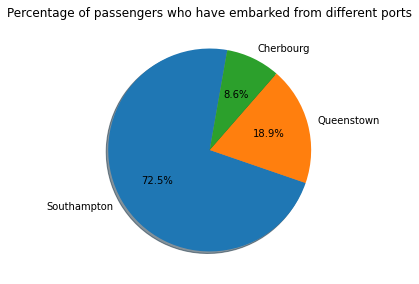

In [26]:
#Calculate the percentage of passengers who have embarked from different ports, draw it on a pie chart
persantage_class = data['Embarked'].value_counts() / len(data)
plt.figure(figsize=(10,6))
x1 = plt.subplot(121, aspect='equal')
plt.pie(persantage_class, labels=['Southampton', 'Queenstown', 'Cherbourg'], autopct='%1.1f%%', startangle=80, shadow=True)
plt.title('Percentage of passengers who have embarked from different ports') 

From the obtained results we can conclide: most of the passengers embarked from Southampton and least of them embarked from Cherbourg.

* Age

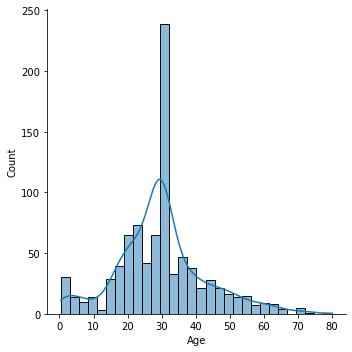

In [27]:
# Determine the distribution of ages
sns.displot(data['Age'],kde = True)

In [28]:
# For the greatest clarity we will split the data into intervals of the same length
bins=[0,16,32,48,64,80]
labels=['менее 16','16-32','32 -48 ','48-64', '64 и более']
data['Age_range'] = pd.cut(data['Age'], bins=bins, labels=labels)

<AxesSubplot:xlabel='Age_range', ylabel='Count'>

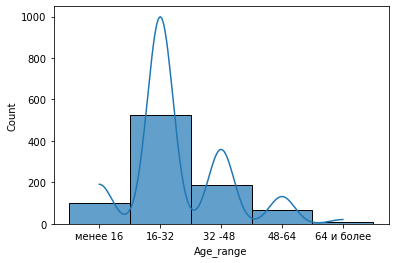

In [29]:
sns.histplot(data=data, x='Age_range', alpha = .7, kde = True)

In [30]:
min_v = data['Age'].min()
max_v = data['Age'].max()
median_v= data['Age'].median()
mean_v = data['Age'].mean()
mode_v = data['Age'].mode()
print(f'median',median_v, '\n', f'mean',mean_v, '\n', f'mode',mode_v, '\n', f'min',min_v,'\n', f'max',max_v,)

median 29.69911764705882 
 mean 29.699117647058763 
 mode 0    29.699118
dtype: float64 
 min 0.42 
 max 80.0


 As can be seen from the histogram the data is positively skewed. It is important to note that the average, median, modal values are equal at the same mark (29 years old).

* Fare

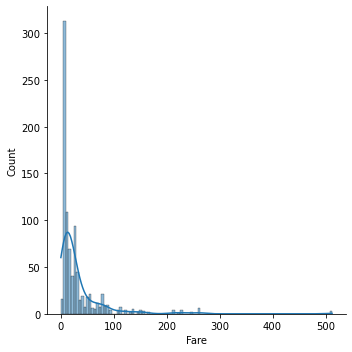

In [31]:
# Determine the distribution of Fare
sns.displot(data['Fare'], kde=True)

In [32]:
mode_v=data['Fare'].mode()
median_v=data['Fare'].median()
mean_v=data['Fare'].mean()
print(f'mode',mode_v,'\n',f'median',median_v,'\n',f'mean',mean_v )

mode 0    8.05
dtype: float64 
 median 14.4542 
 mean 32.2042079685746


The mean and median values of Fare are not close. The proportion of passengers with fares around median is pretty high. From the other side, it is not so high around mean.

## Travelling with family or alone

In [33]:
# Determine whether the passengers traveled alone or with relatives 
data['With family'] = data['SibSp'] + data['Parch']
data['With family'].loc[data['With family']>0] = 'With family'
data['With family'].loc[data['With family']==0] = 'Alone'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The number of passengers who travelled with family/alone')

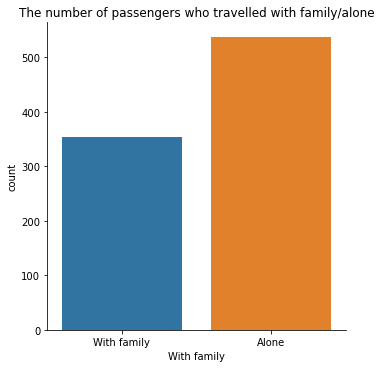

In [34]:
# Depict the number of passengers who traveled alone or with relatives 
sns.catplot('With family', data=data, kind='count')
plt.title('The number of passengers who travelled with family/alone')

Text(0.5, 1.0, 'Percentage of passengers who traveled with relatives and alone')

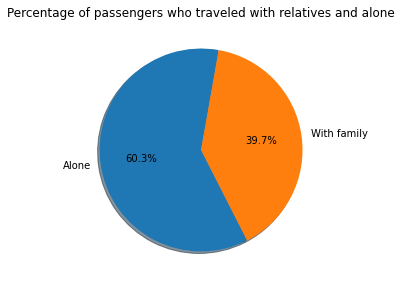

In [35]:
#Calculate the percentage of passengers who traveled with family and alone
persantage_class = data['With family'].value_counts() / len(data)
plt.figure(figsize=(10,6))
x1 = plt.subplot(121, aspect='equal')
plt.pie(persantage_class, labels=['Alone', 'With family'], autopct='%1.1f%%', startangle=80, shadow=True)
plt.title('Percentage of passengers who traveled with relatives and alone') 

## Determination of family size

In [36]:
# Add a new column which depict family size
data['Family_Size'] = data['Parch'] + data['SibSp']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The number of passengers who travelled with family/alone')

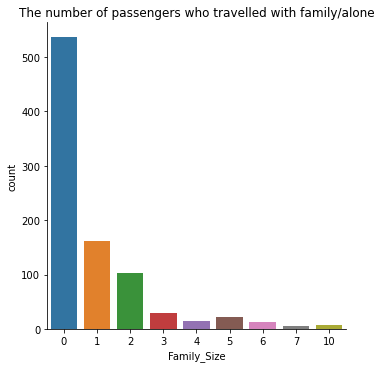

In [37]:
# Depict the number of passengers who traveled with various number of relatives
sns.catplot('Family_Size', data=data, kind='count')
plt.title('The number of passengers who travelled with family/alone')

Text(0.5, 1.0, 'Percentage of passengers who traveled with various number relatives')

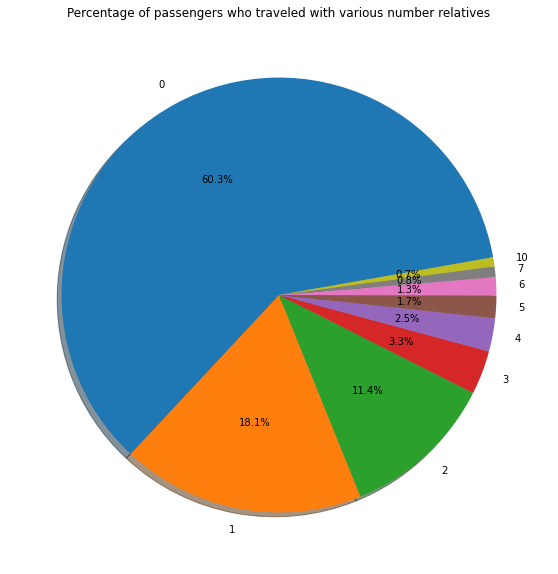

In [38]:
#Calculate the percentage of passengers who traveled with various number of relatives
persantage_class = data['Family_Size'].value_counts() / len(data)
plt.figure(figsize=(25,10))
x1 = plt.subplot(121, aspect='equal')
plt.pie(persantage_class, labels=[0,1,2,3,4,5,6,7,10], autopct='%1.1f%%', startangle=10, shadow=True)
plt.title('Percentage of passengers who traveled with various number relatives') 

Thus, on board the Titanic there were most passengers who traveled without family. The maximum family size is 10 people.

## 2. Assessment of the relationship between each variable and the target variable

After studying each variable, selecting the appropriate ones, we will find out how they impact on the target variable.
Specially, we will consider the relationship between ['Pclass', 'Sex', 'Age', 'Cabin', 'Embarked','With family'] and 'Survived'. 

### The relationship between gender and survival

In [39]:
sex_df_s=data.groupby(['Survived','Sex']).size()
sex_df_s

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

In [40]:
sex_df=sex_df_s.unstack('Sex')
sex_df

Sex,female,male
Survived,,
0,81,468
1,233,109


In [41]:
sex_persantage = sex_df/sex_df.sum()
sex_persantage

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


Text(0.5, 1.0, 'Number of survived and dead among male and female')

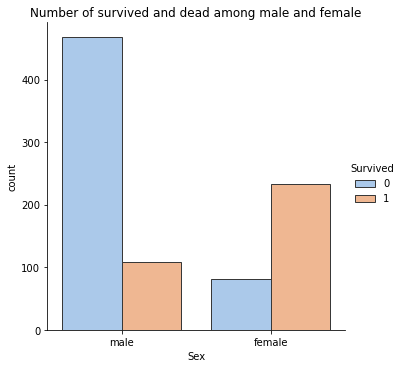

In [42]:
sns.catplot(x ='Sex', hue ='Survived', kind ='count', palette='pastel', edgecolor='.22',data = data)
plt.title('Number of survived and dead among male and female') 

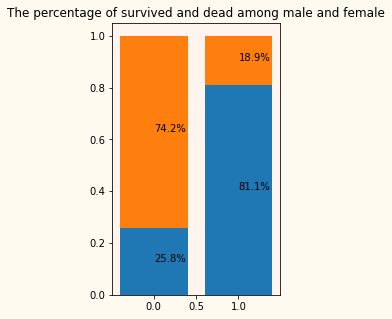

In [43]:
fig, ax = plt.subplots()

x=range(2)
data_n = sex_persantage.loc[0,:]
data_s =sex_persantage.loc[1,:]

ax.bar(x, data_n)
ax.bar(x, data_s, bottom = data_n)

fig.set_figwidth(3)    
fig.set_figheight(5)    
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

ax.set_title('The percentage of survived and dead among male and female')
for x,y,z in zip(range(2),data_n,data_s):
    ax.text(x,y/2,'{:.1%}'.format(y))
    ax.text(x,y+z/2,'{:.1%}'.format(z))
plt.show()

As it is expected, the proportion of survived women is much higher than of men.

## The relationship between Age and survival

In [44]:
age_s=data.groupby(['Survived','Age_range']).size()
age_s

Survived  Age_range 
0         менее 16       45
          16-32         343
          32 -48        112
          48-64          39
          64 и более     10
1         менее 16       55
          16-32         180
          32 -48         76
          48-64          30
          64 и более      1
dtype: int64

In [45]:
age_df = age_s.unstack()
age_df

Age_range,менее 16,16-32,32 -48,48-64,64 и более
Survived,,,,,
0,45,343,112,39,10
1,55,180,76,30,1


In [46]:
age_persantage = age_df/age_df.sum()
age_persantage

Age_range,менее 16,16-32,32 -48,48-64,64 и более
Survived,,,,,
0,0.45,0.655832,0.595745,0.565217,0.909091
1,0.55,0.344168,0.404255,0.434783,0.090909


Text(0.5, 1.0, 'Number of survived and dead according to age')

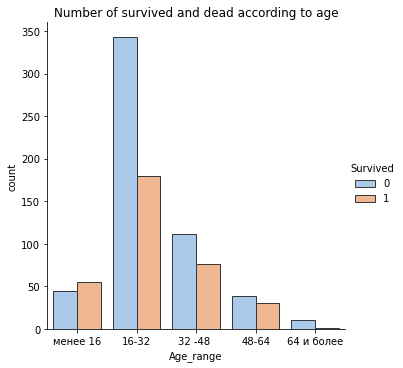

In [47]:
sns.catplot(x ="Age_range", hue ="Survived", kind ="count", palette="pastel", edgecolor=".22",data = data)
plt.title('Number of survived and dead according to age') 

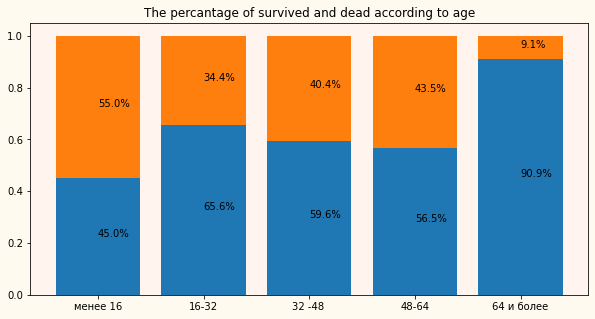

In [48]:
fig, ax = plt.subplots()

x=['менее 16','16-32','32 -48 ','48-64', '64 и более']
data_n = age_persantage.loc[0,:]
data_s =age_persantage.loc[1,:]

ax.bar(x, data_n)
ax.bar(x, data_s, bottom = data_n)

fig.set_figwidth(10)    
fig.set_figheight(5)    
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

ax.set_title('The percantage of survived and dead according to age')
for x,y,z in zip(range(5),data_n,data_s):
    ax.text(x,y/2,'{:.1%}'.format(y))
    ax.text(x,y+z/2,'{:.1%}'.format(z))
plt.show()

As we can notice, the survival rate of children and adolescents is the highest. The higher the age of the passengers, the lower the survival rate. The situation with the elderly population is completely different. Only 9.1% of the total number of people aged 60+ managed to survive.

## The relationship between Passenger class and survival

In [49]:
class_s = data.groupby(['Survived','Pclass']).size()
class_s

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

In [50]:
class_df = class_s.unstack()
class_df

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [51]:
class_percentage = class_df/class_df.sum()
class_percentage

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


Text(0.5, 1.0, 'Number of survived and dead according to age')

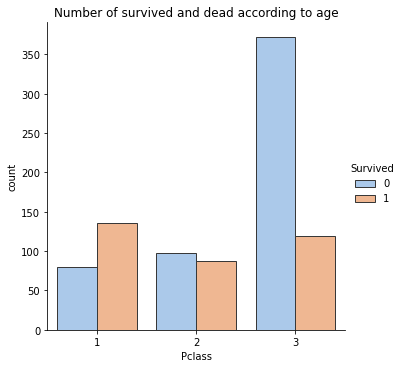

In [52]:
sns.catplot(x ='Pclass', hue ='Survived', kind ='count', palette='pastel', edgecolor='.22',data = data)
plt.title('Number of survived and dead according to age') 

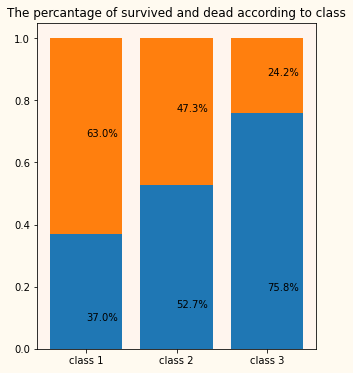

In [53]:
fig, ax = plt.subplots()

x=['class 1', 'class 2', 'class 3']
data_n = class_percentage.loc[0,:]
data_s =class_percentage.loc[1,:]

ax.bar(x, data_n)
ax.bar(x, data_s, bottom = data_n)

fig.set_figwidth(5)    
fig.set_figheight(6)    
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

ax.set_title('The percantage of survived and dead according to class')
for x,y,z in zip(range(3), data_n,data_s):
    ax.text(x,y/4,'{:.1%}'.format(y))
    ax.text(x,y+z/2,'{:.1%}'.format(z))
plt.show()

 Based on our subplot of survival rates for all the passengers within each passenger class,we can conclude:
 63% of the passengers who travelled the 1st class survived. In the 2nd and the 3d classes 47.3% and 24.2% of people survived respectively. We had assumed that those who travelled in higher classes were most likely to survive. Statistics once again confirms our assumptions.

## The relationship between fare and survival

In [54]:
# Divide the values of column 'Fare' into 4 bins
data['Fare_range'] = pd.qcut(data['Fare'], 4)

<AxesSubplot:xlabel='Fare_range', ylabel='Survived'>

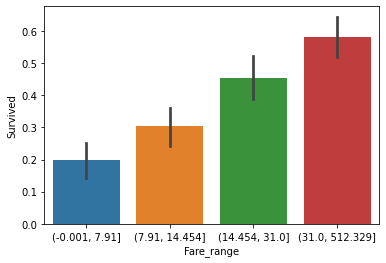

In [55]:
sns.barplot(x ='Fare_range', y ='Survived', data = data)

## The relationship between embarkment point and survival

In [56]:
embarked_s = data.groupby(['Survived','Embarked']).size()
embarked_s

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           219
dtype: int64

In [57]:
embarked_df = embarked_s.unstack()
embarked_df

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,219


In [58]:
embarked_percentage = embarked_df/embarked_df.sum()
embarked_percentage

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.660991
1,0.553571,0.38961,0.339009


Text(0.5, 1.0, 'Number of survived and dead according to embarkment point')

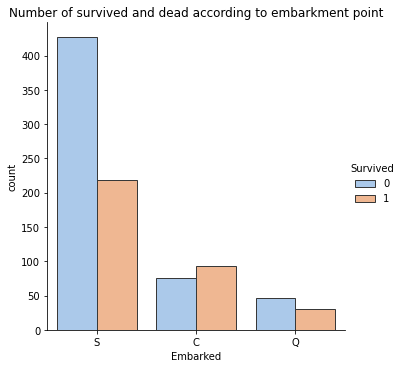

In [59]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', palette='pastel', edgecolor='.22', data = data)
plt.title('Number of survived and dead according to embarkment point') 

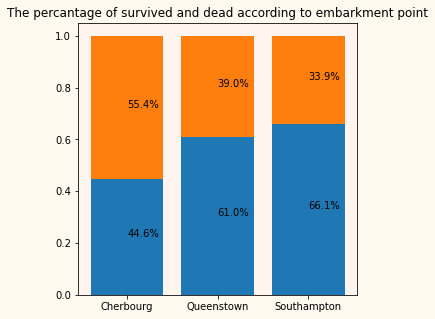

In [60]:
fig, ax = plt.subplots()

x=['Cherbourg', 'Queenstown', 'Southampton']
data_n = embarked_percentage.loc[0,:]
data_s =embarked_percentage.loc[1,:]

ax.bar(x, data_n)
ax.bar(x, data_s, bottom = data_n)

fig.set_figwidth(5)    
fig.set_figheight(5)    
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

ax.set_title('The percantage of survived and dead according to embarkment point')
for x,y,z in zip(range(3),data_n,data_s):
    ax.text(x,y/2,'{:.1%}'.format(y))
    ax.text(x,y+z/2,'{:.1%}'.format(z))
plt.show()

So, 55.4% of passengers who embarked at Cherbourg survived versus 33.9% of passengers who embarked at Southampton survived. Cherbourg is the only embarkment point where the number of survivors exceeded the number of dead.

## The relationship between travelling with family/alone and survival

In [61]:
with_fam_s = data.groupby(['Survived','With family']).size()
with_fam_s


Survived  With family
0         Alone          374
          With family    175
1         Alone          163
          With family    179
dtype: int64

In [62]:
with_fam_df = with_fam_s.unstack()

In [63]:
with_fam_percentage = with_fam_df/with_fam_df.sum()
with_fam_percentage

With family,Alone,With family
Survived,,
0,0.696462,0.49435
1,0.303538,0.50565


Text(0.5, 1.0, 'Number of survived and dead according to the fact if a passenger travelled alone or with family')

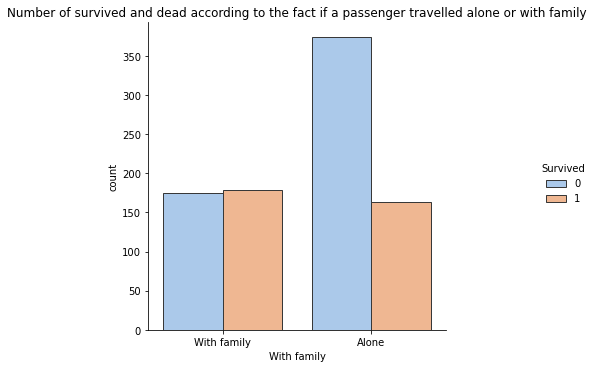

In [64]:
sns.catplot(x ='With family', hue ='Survived', kind ='count', palette='pastel', edgecolor='.22', data = data)
plt.title('Number of survived and dead according to the fact if a passenger travelled alone or with family') 

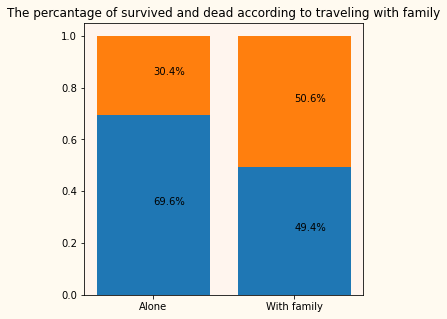

In [65]:
fig, ax = plt.subplots()

x=['Alone', 'With family']
data_n = with_fam_percentage.loc[0,:]
data_s = with_fam_percentage.loc[1,:]

ax.bar(x, data_n)
ax.bar(x, data_s, bottom = data_n)

fig.set_figwidth(5)    
fig.set_figheight(5)    
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

ax.set_title('The percantage of survived and dead according to traveling with family')
for x,y,z in zip(range(3),data_n,data_s):
    ax.text(x,y/2,'{:.1%}'.format(y))
    ax.text(x,y+z/2,'{:.1%}'.format(z))
plt.show()

Statistics shows, that a larger number of passengers who did not travel alone were able to survive.

## The relationship between family size and survival

In [66]:
fam_size_s = data.groupby(['Survived','Family_Size']).size()
fam_size_s

Survived  Family_Size
0         0              374
          1               72
          2               43
          3                8
          4               12
          5               19
          6                8
          7                6
          10               7
1         0              163
          1               89
          2               59
          3               21
          4                3
          5                3
          6                4
dtype: int64

In [67]:
fam_size_df = fam_size_s.unstack()
fam_size_df

Family_Size,0,1,2,3,4,5,6,7,10
Survived,,,,,,,,,
0,374.0,72.0,43.0,8.0,12.0,19.0,8.0,6.0,7.0
1,163.0,89.0,59.0,21.0,3.0,3.0,4.0,NaN,NaN


In [68]:
fam_size_percentage = fam_size_s/fam_size_s.sum()
fam_size_percentage

Survived  Family_Size
0         0              0.419753
          1              0.080808
          2              0.048260
          3              0.008979
          4              0.013468
          5              0.021324
          6              0.008979
          7              0.006734
          10             0.007856
1         0              0.182941
          1              0.099888
          2              0.066218
          3              0.023569
          4              0.003367
          5              0.003367
          6              0.004489
dtype: float64

Text(0.5, 1.0, 'Number of survived and dead according to the Family size')

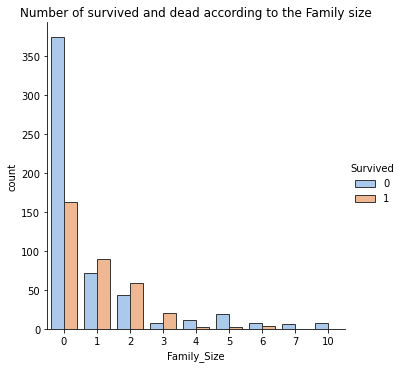

In [69]:
sns.catplot(x ='Family_Size', hue ='Survived', kind ='count', palette='pastel', edgecolor='.22', data = data)
plt.title('Number of survived and dead according to the Family size') 

The graph clearly shows a trend - the larger the family size, the less likely the survival of a person belonging to this family.

## 3. Assessing interactions between variables

C:\Users\9E0A~1\AppData\Local\Temp/ipykernel_13792/1936532804.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot = True, ax=ax)


<AxesSubplot:>

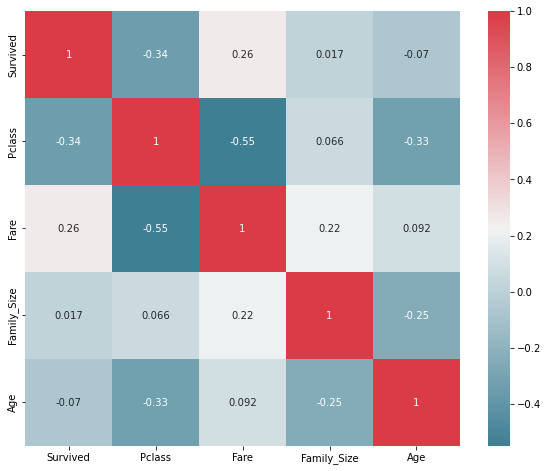

In [70]:

f, ax = plt.subplots(figsize=(10, 8))
corr = data[['Survived','Pclass','Fare','Age_range', 'Family_Size','Age', 'Fare_range']].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot = True, ax=ax)

As can be seen from the correlation matrix, the greatest closeness of the relationship is observed between the target variable and Pclass, Fare. A fairly close relationship is also observed between the class number and fare. There is a relationship between age of the passengers and Pclass too.

## 4. Exploration of data cross many dimensions

### Relationship betweeen Survival rate, Sex and Pclass

In [71]:
# Find out how the survival rate depends on the gender and Pclass of passengers at the same time 

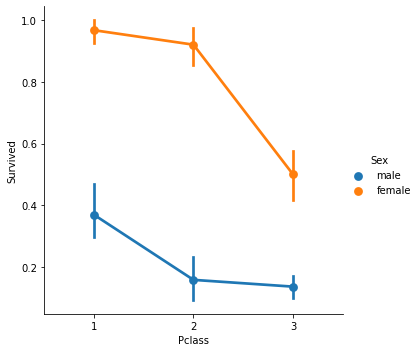

In [72]:
sns.catplot(x='Pclass', y='Survived' ,data=data, hue='Sex', kind='point')

So, it means that despite the fact in which class the passengers travelled, the probability of man's survival was several times less than of wemen.

### Relationship betweeen Survival rate, Sex and Age

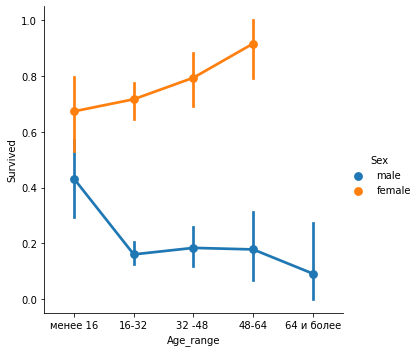

In [73]:
sns.catplot(x='Age_range', y='Survived' ,data=data, hue='Sex', kind='point')

Statistics show that despite the Age of passengers (even for the category 0-16 yo) the probability of women survival is much higher.

### Relationship between Pclass, Sex, Age

In [74]:
# Find out relationship between Pclass, Sex and Age

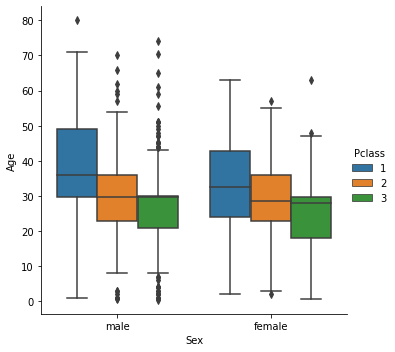

In [75]:
sns.catplot(x='Sex', y='Age', data=data, kind='box', hue='Pclass')

From the graph above, we conclude that most of the elderly people traveled first class. Which may be explained by the fact that they were rich. Young people aged 25 to 35 mostly traveled second and third classes.

### Relationship between Fare, Survival and Pclass

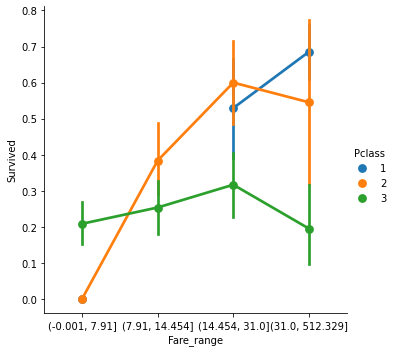

In [76]:
sns.catplot(x='Fare_range', y='Survived', data=data, hue='Pclass', kind='point')

As it can be noticed, in general, the probability of survival of passengers is higher the better the class and, accordingly, the higher the ticket price.

### Relationship between Age, Fare, Sex, Pclass

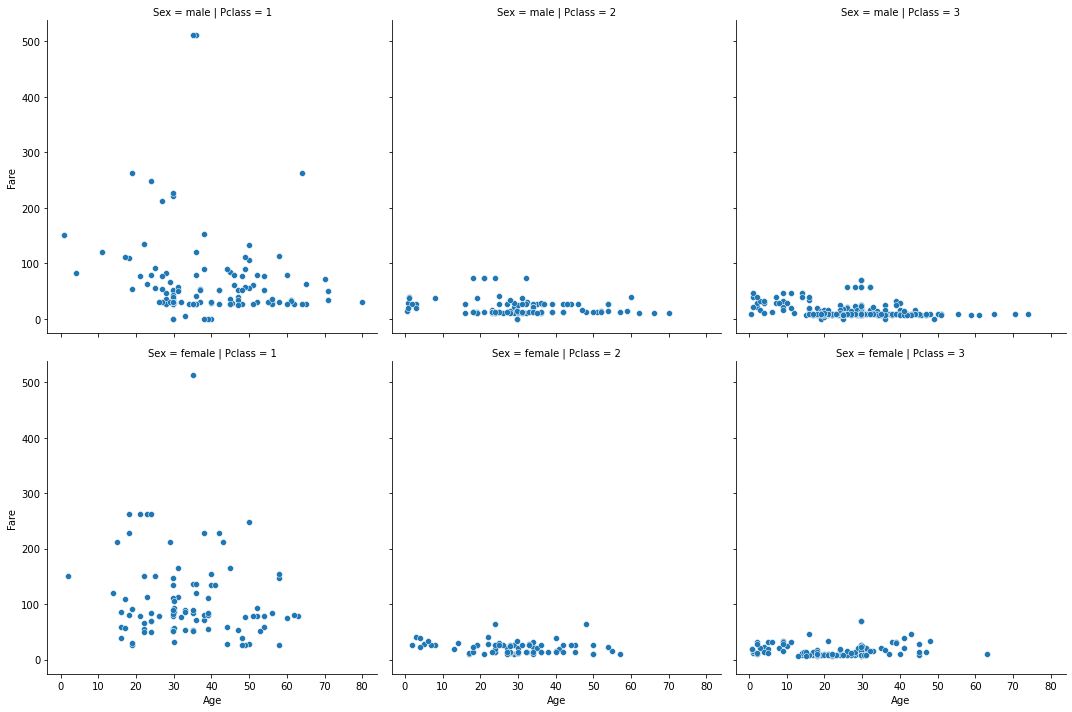

In [77]:
sns.relplot(x='Age', y='Fare', data=data, row='Sex', col='Pclass')

From the above plot we may say that there was no huge difference in Fare for second and third-class passengers. There was a small percentage of children who traveled the first class. The third class had more children. Most of the second and third-class passengers were between 20 and 40 yo.

# CONCLUSION

Thus, an analysis of data related to a very sad event was carried out.

> On April 15, 1912 the luxurious unsinkable steamer Titanic collided with a block of ice on the coast of Newfoundlen. Two and a half hours later, at 2:20 a.m., the ship sank.The tragedy of the Titanic has remained one of the most intriguing aspects of world history. Even a century later, the tragedy of the Titanic was studied in detail, becoming the subject of discussion by artists, cinematographers and writers. From historical and fictional stories, from museums to theaters, from websites to mobile apps - the great ship has become a pop culture icon.

* So, we found that women and children did have a better chance of survival and were allocated to the boats in the first place. However, it is worth noting that the survival rate among boys-children was still less than the survival rate among girls-children. 
* As it is expected,the passenger class has an effect on survival overall, however the gender factor still prevails.
* Embarkment point had an impact on survival too. So, 55.4% of passengers who embarked at Cherbourg survived versus 33.9% of passengers who embarked at Southampton survived. Cherbourg is the only embarkment point where the number of survivors exceeded the number of dead.
* As we found, the survival rate of children and adolescents is the highest. The higher the age of the passengers, the lower the survival rate. The situation with the elderly population is completely different. Only 9.1% of the total number of people aged 60+ managed to survive.
* It is trully that those passengers who traveled with family were most likely to survive. But family size had an impact too. Perhaps, the reason is a psychological factor. For example, among the passengers whose family size was 10 people were no one who managed to survive.

In addition, some other trends have been identified, like the dependence of the fare on the Pclass; the number of passengers traveling in a certain class and their age category, etc. In more detail, these trends are described in the analysis above. PassengerId, Name, Ticket, Cabin were not analysed, since they have str type and don’t contribute much to the outcome. 